<a href="https://colab.research.google.com/github/jackaquamin/myprojects/blob/main/TwoLayerNNHandWritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading the dataset (MNIST)


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_img,train_labels),(test_img,test_labels) = mnist.load_data() 

In [ ]:
# analyze the data
print('Shape of train_img',train_img.shape)
print('Shape of train_labels',train_labels.shape)

print('Shape of test_img',test_img.shape)
print('Shape of test_labels',test_labels.shape)

Shape of train_img (60000, 28, 28)
Shape of train_labels (60000,)
Shape of test_img (10000, 28, 28)
Shape of test_labels (10000,)


The shape: (28, 28)
The corresponding label: 4


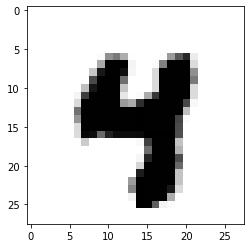

In [ ]:
# visualize the input image (train/test)
import matplotlib.pyplot as plt

# show an image
tmp_img = test_img[48] # 0 means the first index / the first image
plt.imshow(tmp_img, cmap=plt.cm.binary)
print("The shape:",tmp_img.shape)

# check the corresponding labels
tmp_label = test_labels[48]
print('The corresponding label:',tmp_label)

2. Network Architecture ( Simple 2 layers neural network)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
net = models.Sequential()
net.add(layers.Dense(500,activation='relu',input_shape = (28*28,))) # hidden layer 1
net.add(layers.Dense(100,activation='relu'))
net.add(layers.Dense(10,activation='softmax')) # output layer (10 numbers of classes) (binary = sigmoid, multiclass = softmax)
net.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 500)               392500    
                                                                 
 dense_15 (Dense)            (None, 100)               50100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


3. Compile the model

In [ ]:
net.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

4. Preparing data

In [ ]:
# flatten out our input image (28*28)
train_img_data = train_img.reshape(((60000, 28*28)))
print('Shape of original train image', train_img.shape)
print('Shape of train image after reshape', train_img_data.shape)

# range 0-1
train_img_data = train_img_data.astype('float32')/255

# flatten out our input image (28*28)
test_img_data = test_img.reshape(((10000, 28*28)))
print('Shape of original train image', test_img.shape)
print('Shape of train image after reshape', test_img_data.shape)

# range 0-1
test_img_data = test_img_data.astype('float32')/255

Shape of original train image (60000, 28, 28)
Shape of train image after reshape (60000, 784)
Shape of original train image (10000, 28, 28)
Shape of train image after reshape (10000, 784)


5. Prepare the labels

In [ ]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels1 = to_categorical(train_labels)
print('Original labels',train_labels)
print('One-hot encoded labels',train_labels1)

# test labels
test_labels1 = to_categorical (test_labels)
print('Original labels',test_labels)
print('One-hot encoded labels',test_labels1)

Original labels [5 0 4 ... 5 6 8]
One-hot encoded labels [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Original labels [7 2 1 ... 4 5 6]
One-hot encoded labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


6. Train the model


In [ ]:
# train
net.fit(train_img_data,train_labels1,epochs=10,batch_size=32 )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1908 - accuracy: 0.9421
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0813 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0549 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0332 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0207 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0202 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

7. Evaluate the model using the test data


In [ ]:
test_loss,test_acc = net.evaluate(test_img_data,test_labels1)
print('Test loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9785
Test loss: 0.10183689743280411
Test Accuracy: 0.9785000085830688


The shape: (28, 28)


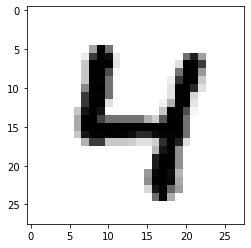

In [ ]:
# test the model using an image (For visualization)
# test image - test_img (the one we didn't reshape (10000,28,28))
# test_img_data (reshaped one (10000,784))
tmp_test_img = test_img [56] # plot as an image (row col)
plt.imshow(tmp_test_img, cmap=plt.cm.binary)
print("The shape:",tmp_test_img.shape)

In [ ]:
# put image into trained neural net
tmp_test_img = tmp_test_img.reshape((1,28*28))
print(tmp_test_img.shape)

# network
net_out = net.predict(tmp_test_img)
net_out

(1, 784)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
# the output of network is in one-hot format
# change it to the original label (0 to 9)

out_class = np.argmax(net_out,axis=-1)
print( "Output class is: ", out_class)

Output class is:  [4]
